#Integrantes:
- Gomez Mendoza Franklin Kevin
- Mendoza Huerto Frankling Augusto
- Pacheco Rodriguez Arnold

#Pasos para un proyecto de aprendizaje estadístico (Machine learning)
Este notebook se basa en el capítulo 2 y el apéndice 2 del libro Hands-On Machine learning with Scikit-Learn & Tensorflow de Aurélien Géron, pero adaptado a un problema "real" de clasificación.

Estas son los etapas básicas que se deben seguir al desarrollar un proyecto de aprendizaje estadístico (o machine learning):

1. Enmarcar el problema y observar el panorama general.
2. Obtener los datos.
3. Explorar y visualizar los datos para obtener información.
4. Preparar los datos para exponer mejor los patrones a los algoritmos de aprendizaje estadístico.
5. Explorar muchos modelos diferentes y seleccionar los mejores.
6. Poner a punto (fine-tune) esos modelos y si es posible combinarlos en una gran solución.
7. Presentar la solución, ¿Cual es la mejor solución?
8. Lanzar, monitorear y mantener el sistema implementado.

### Ejercicio

1. Mejore los resultados del Modelo propuesto, pruebe cambiar diferentes hiperparámetros, otros Learning Rates, más capas, etc. Grafique la matriz de confusión para el conjunto de test.

2. Vea este problema como uno de regresión (use MLPRegressor) tomando la variable de salida (la clase) como valor numérico (cera de 0 y 1). Al final defina la clase al calcular una sigmoide y luego con la probabilidad mayoritaria. Calcule métricas de regresión y clasificacion. ¿Es mejor, peor, por qué?

# 1. ¿Cúal es el problema?

## Heart Disease Data Set

https://archive.ics.uci.edu/ml/datasets/Heart+Disease


This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  In particular, **the Cleveland database** is the only one that has been used by ML researchers to this date.  The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).  
   
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

One file has been "processed", that one containing the Cleveland database.  All four unprocessed files also exist in this directory.
    
5. Number of Instances:
        Database:    # of instances:
          Cleveland: 303
          Hungarian: 294
        Switzerland: 123
      Long Beach VA: 200

6. Number of Attributes: 76 (including the predicted attribute)

7. Attribute Information:

      -- Only 14 used
      
      -- 1. #3  (age)       
      -- 2. #4  (sex)       
      -- 3. #9  (cp)        
      -- 4. #10 (trestbps)  
      -- 5. #12 (chol)      
      -- 6. #16 (fbs)       
      -- 7. #19 (restecg)   
      -- 8. #32 (thalach)   
      -- 9. #38 (exang)     
      -- 10. #40 (oldpeak)   
      -- 11. #41 (slope)     
      -- 12. #44 (ca)        
      -- 13. #51 (thal)      
      -- 14. #58 (num)       (the predicted attribute)

Complete attribute documentation:

      1 id: patient identification number
      2 ccf: social security number (I replaced this with a dummy value of 0)
      3 age: age in years
      4 sex: sex (1 = male; 0 = female)
      5 painloc: chest pain location (1 = substernal; 0 = otherwise)
      6 painexer (1 = provoked by exertion; 0 = otherwise)
      7 relrest (1 = relieved after rest; 0 = otherwise)
      8 pncaden (sum of 5, 6, and 7)
      9 cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
     10 trestbps: resting blood pressure (in mm Hg on admission to the
        hospital)
     11 htn
     12 chol: serum cholestoral in mg/dl
     13 smoke: I believe this is 1 = yes; 0 = no (is or is not a smoker)
     14 cigs (cigarettes per day)
     15 years (number of years as a smoker)
     16 fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
     17 dm (1 = history of diabetes; 0 = no such history)
     18 famhist: family history of coronary artery disease (1 = yes; 0 = no)
     19 restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
     20 ekgmo (month of exercise ECG reading)
     21 ekgday(day of exercise ECG reading)
     22 ekgyr (year of exercise ECG reading)
     23 dig (digitalis used furing exercise ECG: 1 = yes; 0 = no)
     24 prop (Beta blocker used during exercise ECG: 1 = yes; 0 = no)
     25 nitr (nitrates used during exercise ECG: 1 = yes; 0 = no)
     26 pro (calcium channel blocker used during exercise ECG: 1 = yes; 0 = no)
     27 diuretic (diuretic used used during exercise ECG: 1 = yes; 0 = no)
     28 proto: exercise protocol
          1 = Bruce     
          2 = Kottus
          3 = McHenry
          4 = fast Balke
          5 = Balke
          6 = Noughton
          7 = bike 150 kpa min/min  (Not sure if "kpa min/min" is what was
              written!)
          8 = bike 125 kpa min/min  
          9 = bike 100 kpa min/min
         10 = bike 75 kpa min/min
         11 = bike 50 kpa min/min
         12 = arm ergometer
     29 thaldur: duration of exercise test in minutes
     30 thaltime: time when ST measure depression was noted
     31 met: mets achieved
     32 thalach: maximum heart rate achieved
     33 thalrest: resting heart rate
     34 tpeakbps: peak exercise blood pressure (first of 2 parts)
     35 tpeakbpd: peak exercise blood pressure (second of 2 parts)
     36 dummy
     37 trestbpd: resting blood pressure
     38 exang: exercise induced angina (1 = yes; 0 = no)
     39 xhypo: (1 = yes; 0 = no)
     40 oldpeak = ST depression induced by exercise relative to rest
     41 slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
     42 rldv5: height at rest
     43 rldv5e: height at peak exercise
     44 ca: number of major vessels (0-3) colored by flourosopy
     45 restckm: irrelevant
     46 exerckm: irrelevant
     47 restef: rest raidonuclid (sp?) ejection fraction
     48 restwm: rest wall (sp?) motion abnormality
        0 = none
        1 = mild or moderate
        2 = moderate or severe
        3 = akinesis or dyskmem (sp?)
     49 exeref: exercise radinalid (sp?) ejection fraction
     50 exerwm: exercise wall (sp?) motion
     51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
     52 thalsev: not used
     53 thalpul: not used
     54 earlobe: not used
     55 cmo: month of cardiac cath (sp?)  (perhaps "call")
     56 cday: day of cardiac cath (sp?)
     57 cyr: year of cardiac cath (sp?)
     58 num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)
     59 lmt
     60 ladprox
     61 laddist
     62 diag
     63 cxmain
     64 ramus
     65 om1
     66 om2
     67 rcaprox
     68 rcadist
     69 lvx1: not used
     70 lvx2: not used
     71 lvx3: not used
     72 lvx4: not used
     73 lvf: not used
     74 cathef: not used
     75 junk: not used
     76 name: last name of patient
	(I replaced this with the dummy string "name")

9. Missing Attribute Values: Several.  Distinguished with value -9.0.

10. Class Distribution:
        Database:      0   1   2   3   4 Total
          Cleveland: 164  55  36  35  13   303
          Hungarian: 188  37  26  28  15   294
        Switzerland:   8  48  32  30   5   123
      Long Beach VA:  51  56  41  42  10   200


### Cleveland dataset


- *age*: age in years
- *sex*: (1 = male; 0 = female)
- *cp*: chest pain type
- *trestbps*: resting blood pressure (in mm Hg on admission: to the hospital)
- *chol*: serum cholestoral in mg/dl
- *fbs*: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- *restecg*: resting electrocardiographic results
- *thalach*: maximum heart rate achieved
- *exan*: gexercise induced angina (1 = yes; 0 = no)
- *oldpeak*: ST depression induced by exercise relative to rest
- *slope*: the slope of the peak exercise ST segment
- *ca*: number of major vessels (0-3) colored by flourosopy
- *thal*: 3 = normal; 6 = fixed defect; 7 = reversable defect
- *AHD*: angiographic disease status
    - Value 0: < 50% diameter narrowing
    - Value 1: > 50% diameter narrowing

**References**

[Detrano, Robert, et al. "International application of a new probability algorithm for the diagnosis of coronary artery disease." The American journal of cardiology 64.5 (1989): 304-310.](https://www.sciencedirect.com/science/article/pii/0002914989905249)

### Diccionario de variables del conjunto de datos de Enfermedad Cardíaca

- *Age*: Edad del paciente (en años)
- *Sex*: Sexo (1 = masculino, 0 = femenino)
- *ChestPain*: Tipo de dolor de pecho:  
  - *typical*: dolor típico de angina  
  - *atypical* o *nontypical*: dolor atípico  
  - *nonanginal*: dolor no anginoso  
  - *asymptomatic*: sin síntomas
- *RestBP*: Presión arterial en reposo (mm Hg)
- *Chol*: Colesterol sérico en mg/dl
- *Fbs*: Glucosa en ayunas > 120 mg/dl (1 = sí, 0 = no)
- *RestECG*: Resultados del electrocardiograma en reposo  
  - 0 = normal  
  - 1 = anormal leve  
  - 2 = probable o definitiva hipertrofia ventricular izquierda
- *MaxHR*: Frecuencia cardíaca máxima alcanzada
- *ExAng*: Angina inducida por ejercicio (1 = sí, 0 = no)
- *Oldpeak*: Depresión del segmento ST inducida por el ejercicio en comparación con el reposo
- *Slope*: Pendiente del segmento ST durante el ejercicio  
  - 1 = ascendente  
  - 2 = plana  
  - 3 = descendente
- *Ca*: Número de vasos principales coloreados por fluoroscopía (0–3)
- *Thal*: Tipo de talasemia  
  - *normal*  
  - *fixed*: defecto fijo  
  - *reversable*: defecto reversible
- *AHD*: Presencia de enfermedad cardíaca  
  - *Yes* = tiene enfermedad  

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [220]:
df = pd.read_csv('heart.csv', na_values='NA')
df.shape

(303, 15)

In [221]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [223]:
df.dtypes

Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal           object
AHD            object
dtype: object

In [224]:
df.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64


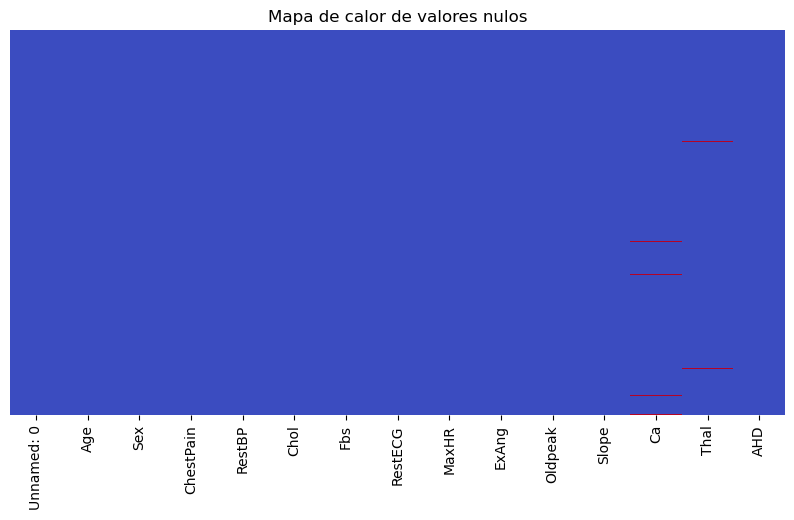

In [225]:
print(df.isnull().sum())
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="coolwarm", yticklabels=False)
plt.title("Mapa de calor de valores nulos")
plt.show()

In [226]:
duplicados = df.duplicated().sum()
print(f"Filas duplicadas: {duplicados}")

Filas duplicadas: 0


In [227]:
for col in df.columns:
  print(f"{col}: {df[col].nunique()}")

Unnamed: 0: 303
Age: 41
Sex: 2
ChestPain: 4
RestBP: 50
Chol: 152
Fbs: 2
RestECG: 3
MaxHR: 91
ExAng: 2
Oldpeak: 40
Slope: 3
Ca: 4
Thal: 3
AHD: 2


In [228]:
print(df['AHD'].value_counts())
df['AHD']=df['AHD'].map({'No':0, 'Yes':1})


AHD
No     164
Yes    139
Name: count, dtype: int64


In [229]:
print(df[['Ca', 'Thal']].isnull().sum())

Ca      4
Thal    2
dtype: int64


Como son pocos variables nulas son muy importantes para el diagnóstico cardiaco, no es recomendable eliminarlas, entonces lo imputamos.

In [230]:
# Imputamos con la moda (valor más frecuente)
df['Ca']=df['Ca'].fillna(df['Ca'].mode()[0])
df['Thal']=df['Thal'].fillna(df['Thal'].mode()[0])

In [231]:
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          0
AHD           0
dtype: int64

###  EXPLORACIÓN Y VISUALIZACIÓN DE LOS DATOS

In [232]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,303.0,152.000000,87.612784,1.0,76.5,152.0,227.5,303.0
Age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
Sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
RestBP,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
Chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
Fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
RestECG,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
MaxHR,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
ExAng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
Oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [233]:
# Verificar si hay alguna columna Unnamed
df.columns = df.columns.str.strip()  # elimina espacios accidentales
unnamed_cols = [col for col in df.columns if "Unnamed" in col]

# Eliminar columna 'Unnamed'ya que no aporta valor
if unnamed_cols:
    df.drop(columns=unnamed_cols, inplace=True)
    print(f"Columnas eliminadas: {unnamed_cols}")
else:
    print("No se encontraron columnas 'Unnamed'.")

Columnas eliminadas: ['Unnamed: 0']


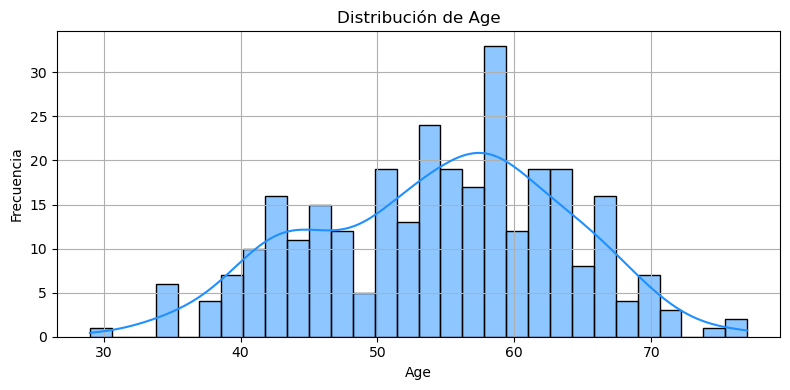

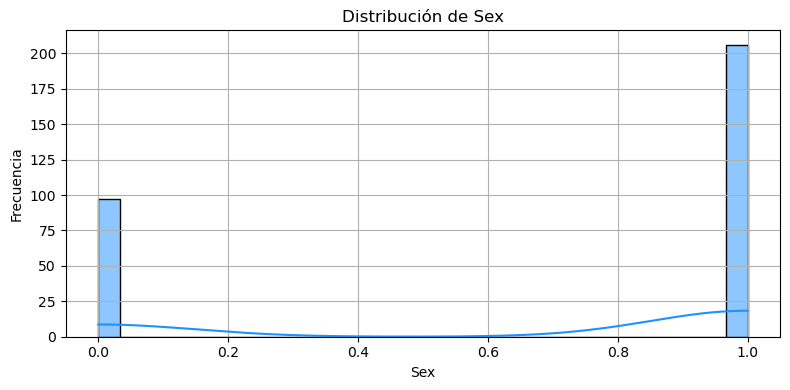

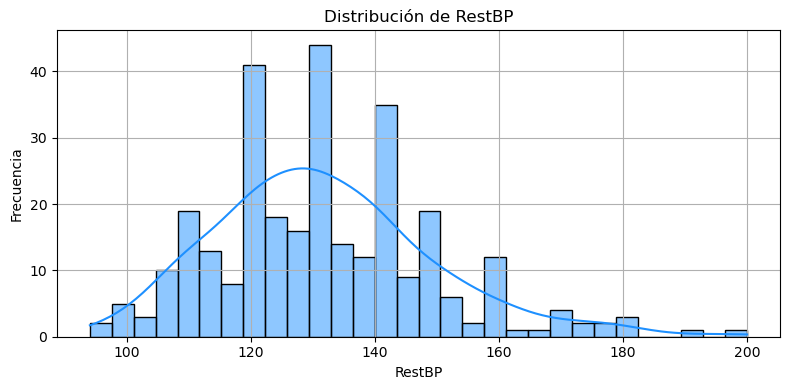

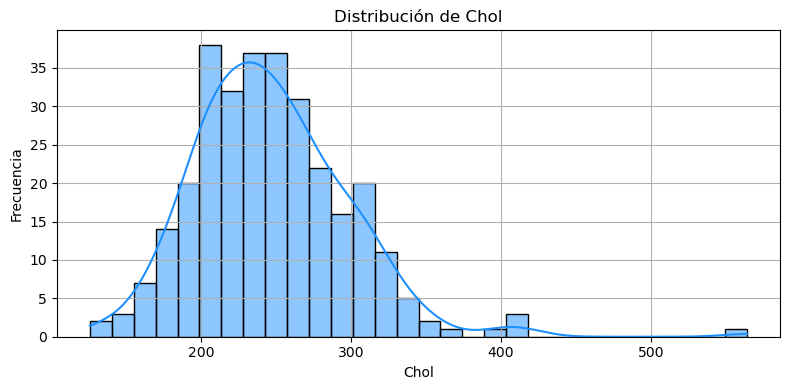

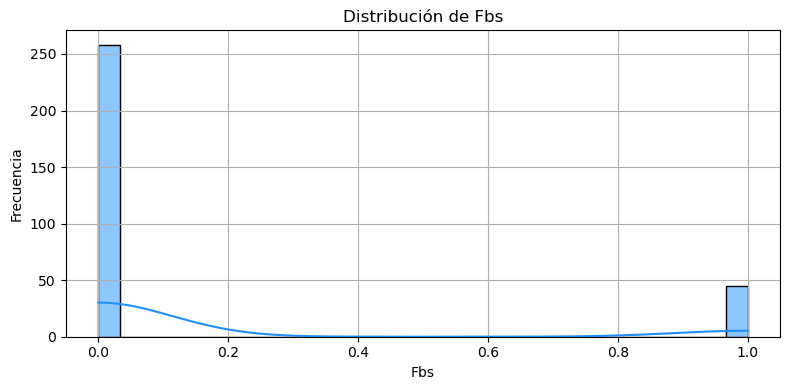

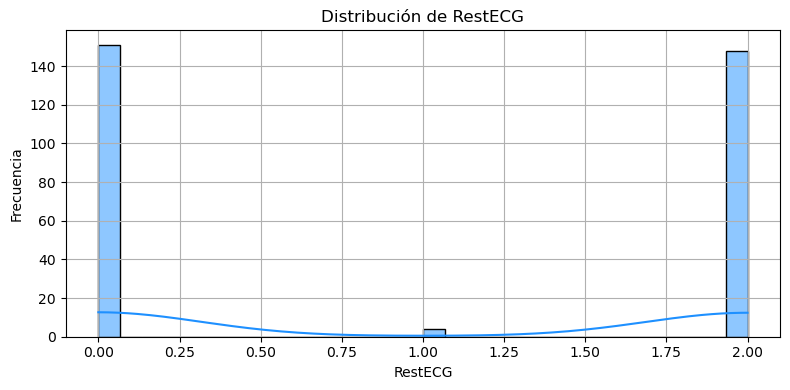

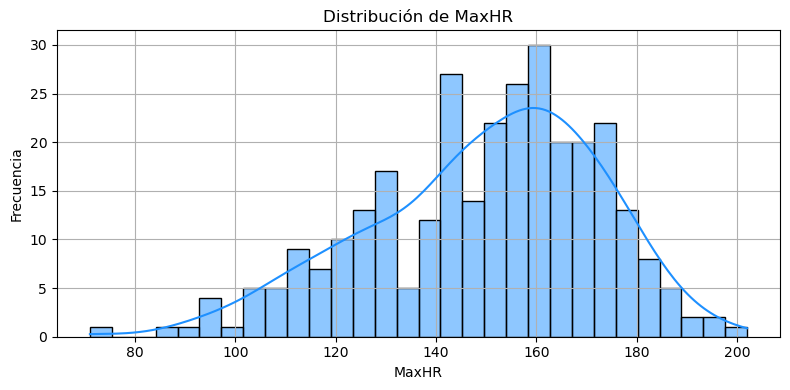

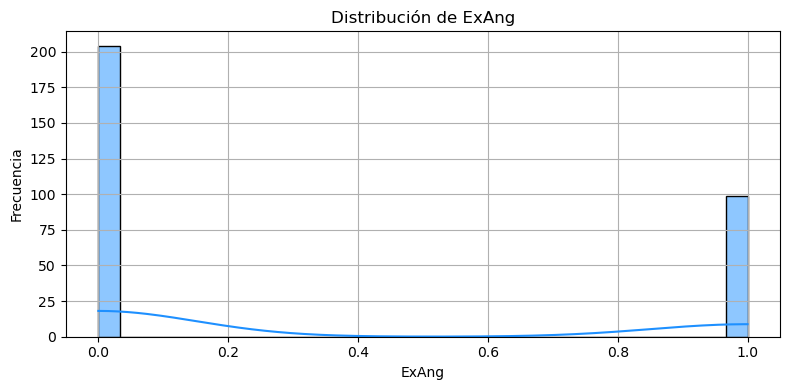

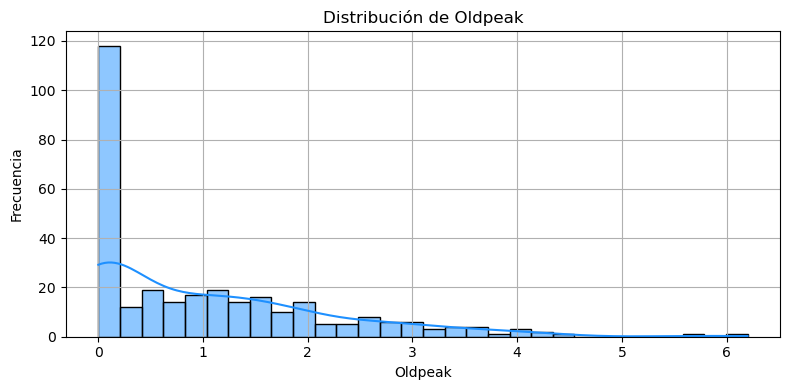

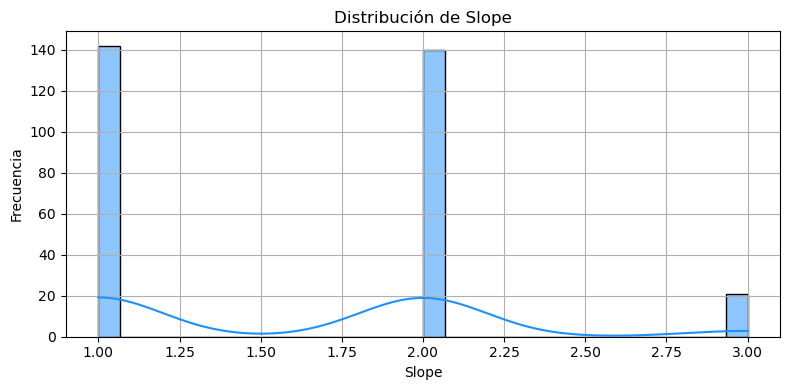

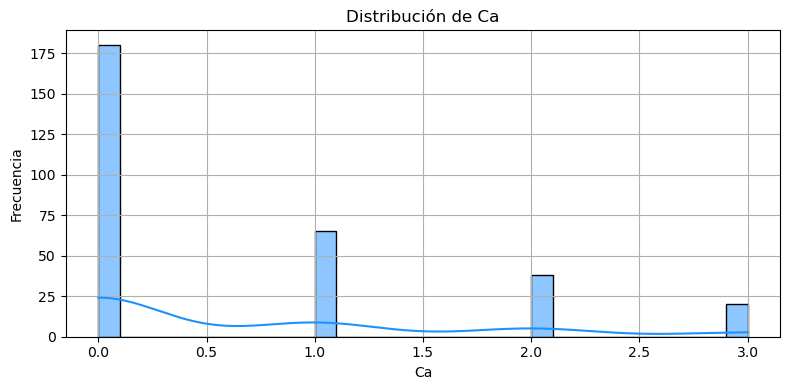

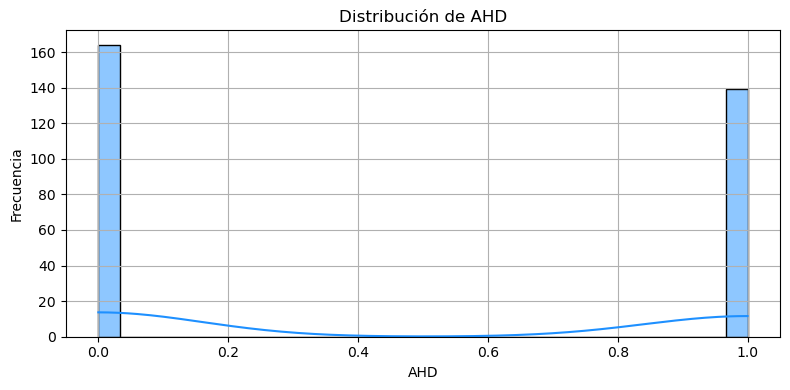

In [234]:
numeric_cols=df.select_dtypes(include='number').columns.to_list()

for col in numeric_cols:
  plt.figure(figsize=(8,4))
  sns.histplot(df[col], kde=True, bins=30, color='dodgerblue')
  plt.title(f'Distribución de {col}')
  plt.xlabel(col)
  plt.ylabel('Frecuencia')
  plt.grid(True)
  plt.tight_layout()
  plt.show()


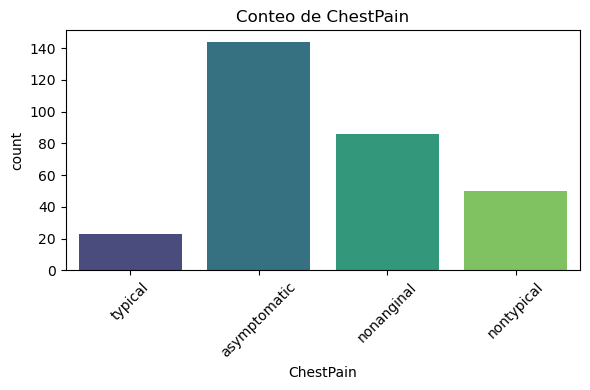

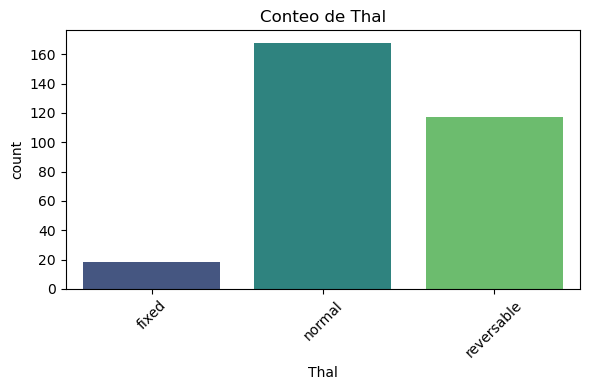

In [235]:
categoricas_cols=df.select_dtypes(include='object').columns.tolist()

for col in categoricas_cols:
  plt.figure(figsize=(6,4))
  sns.countplot(data=df, x=col, palette='viridis')
  plt.title(f'Conteo de {col}')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

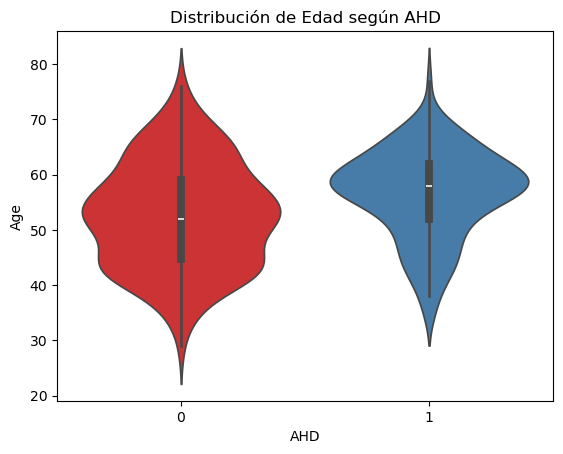

In [236]:
# 1. Edad vs AHD → Violinplot para comparar distribución por clases
sns.violinplot(x='AHD', y='Age',palette='Set1', data=df)
plt.title('Distribución de Edad según AHD')
plt.show()


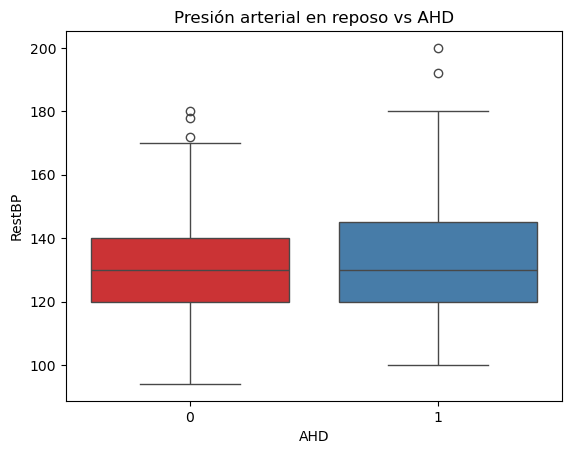

In [237]:
# 2. Trestbps vs AHD → Boxplot para analizar diferencias en la mediana y outliers
sns.boxplot(x='AHD', y='RestBP',palette='Set1', data=df)
plt.title('Presión arterial en reposo vs AHD')
plt.show()


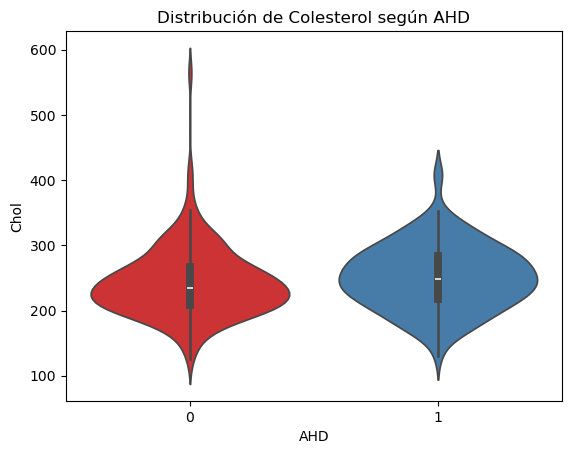

In [238]:
# 3. Colesterol vs AHD → Violinplot para visualizar distribución + outliers
sns.violinplot(x='AHD', y='Chol',palette='Set1',  data=df)
plt.title('Distribución de Colesterol según AHD')
plt.show()

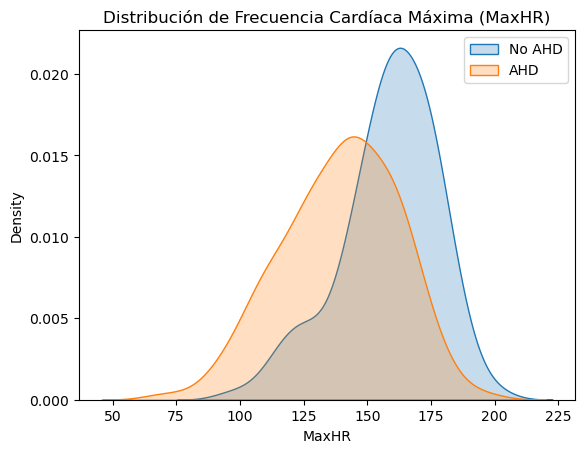

In [239]:
# 4. Thalach vs AHD → KDE Plot: Compara formas de la distribución por clase
sns.kdeplot(data=df[df['AHD']==0]['MaxHR'], label='No AHD', fill=True)
sns.kdeplot(data=df[df['AHD']==1]['MaxHR'], label='AHD', fill=True)
plt.title('Distribución de Frecuencia Cardíaca Máxima (MaxHR)')
plt.legend()
plt.show()

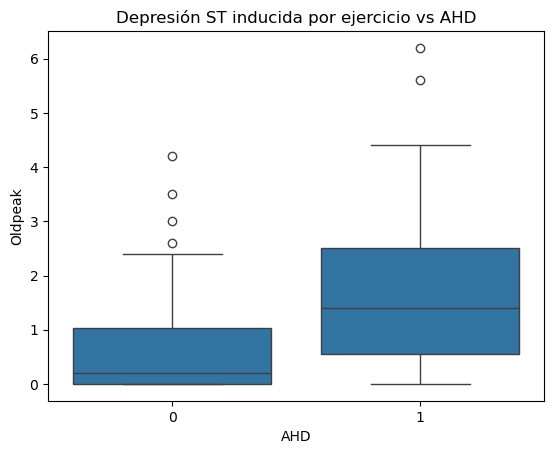

In [240]:
# 5. Oldpeak vs AHD → Boxplot para analizar diferencias en depresión ST
sns.boxplot(x='AHD', y='Oldpeak', data=df)
plt.title('Depresión ST inducida por ejercicio vs AHD')
plt.show()

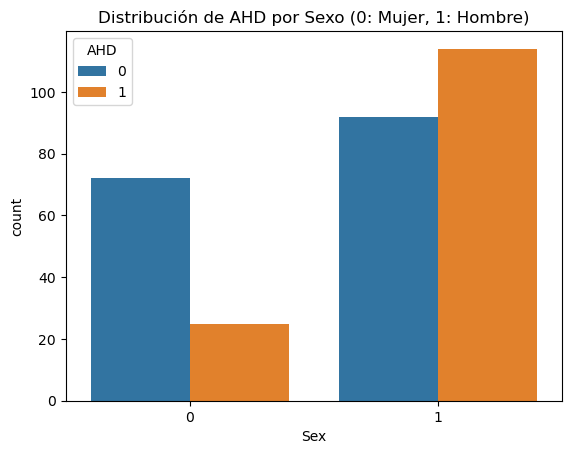

In [241]:
# 6. Sexo vs AHD → Countplot para ver cantidad de casos por género y clase
sns.countplot(x='Sex', hue='AHD', data=df)
plt.title('Distribución de AHD por Sexo (0: Mujer, 1: Hombre)')
plt.show()


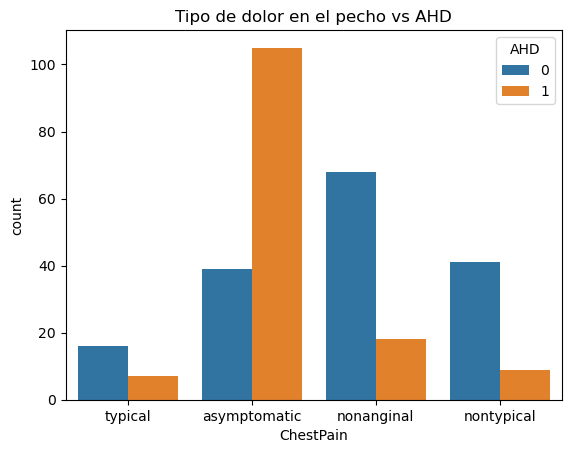

In [242]:
# 7. Cp (Tipo de dolor en el pecho) vs AHD → Countplot porque hay pocos niveles
sns.countplot(x='ChestPain', hue='AHD', data=df)
plt.title('Tipo de dolor en el pecho vs AHD')
plt.show()

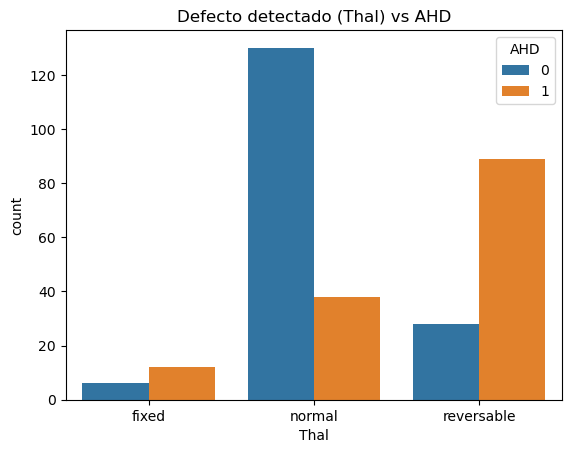

In [243]:
# 9. Thal (defecto cardíaco) vs AHD → Countplot por tratarse de categorías discretas
sns.countplot(x='Thal', hue='AHD', data=df)
plt.title('Defecto detectado (Thal) vs AHD')
plt.show()

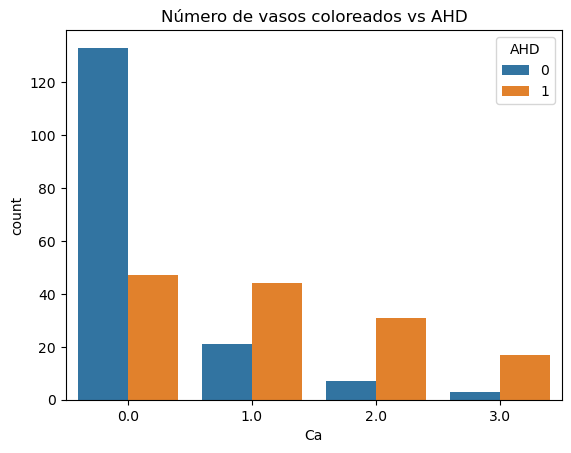

In [244]:
# 10. Ca (vasos coloreados) vs AHD → Countplot para analizar impacto de número de vasos
sns.countplot(x='Ca', hue='AHD', data=df)
plt.title('Número de vasos coloreados vs AHD')
plt.show()

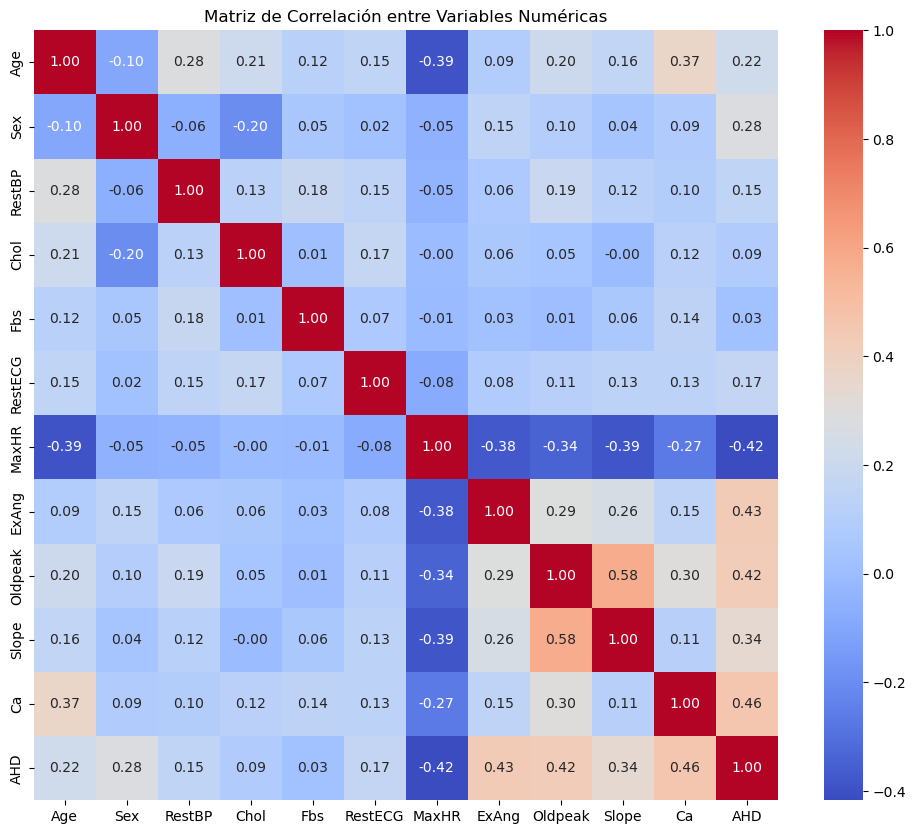

In [245]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

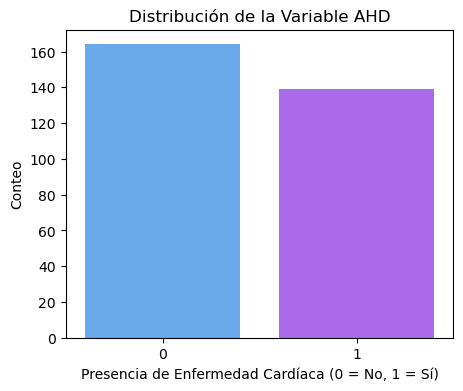

AHD
0    0.541254
1    0.458746
Name: proportion, dtype: float64


In [246]:
plt.figure(figsize=(5, 4))
sns.countplot(x='AHD', data=df, palette='cool')
plt.title('Distribución de la Variable AHD')
plt.xlabel('Presencia de Enfermedad Cardíaca (0 = No, 1 = Sí)')
plt.ylabel('Conteo')
plt.show()

print(df['AHD'].value_counts(normalize=True))

### 4. Preparar datos

In [247]:
print(df.dtypes)

Age            int64
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal          object
AHD            int64
dtype: object


Convertir categóricas a numéricas

In [248]:
from sklearn.preprocessing import LabelEncoder

In [249]:
df['ChestPain'] = LabelEncoder().fit_transform(df['ChestPain'])
df.dtypes

Age            int64
Sex            int64
ChestPain      int64
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal          object
AHD            int64
dtype: object

In [250]:
# Convert 'Thal' column to string type before applying LabelEncoder
df['Thal'] = df['Thal'].astype(str)
df['Thal'] = LabelEncoder().fit_transform(df['Thal'])
df.dtypes

Age            int64
Sex            int64
ChestPain      int64
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal           int64
AHD            int64
dtype: object

In [251]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0


Separamos la variable objetivo y escalamos las variables predictores "x"

In [252]:
from sklearn.preprocessing import StandardScaler

# Separar X e Y
X = df.drop('AHD', axis=1)
y = df['AHD']

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Volver a DataFrame si se quiere conservar nombres de columnas
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

Dividimos el conjunto de datos en entrenamiento y prueba

In [253]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

### 5. Explorar muchos modelos diferentes y seleccionar los mejores

In [254]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [255]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [257]:
modelos = { 'Regresión Logística': LogisticRegression(max_iter=1000, random_state=42),
            'KNN': KNeighborsClassifier(), 'SVM': SVC(probability=True),
            'Árbol de Decisión': DecisionTreeClassifier(random_state=42),
            'Random Forest': RandomForestClassifier(random_state=42),
            'Gradient Boosting': GradientBoostingClassifier(random_state=42),
            'Naive Bayes': GaussianNB() }

In [258]:
resultados = {}

In [259]:
# Entrenamiento y evaluación de cada modelo
for nombre, modelo in modelos.items():
    print(f"\n Entrenando modelo: {nombre}")
    try:
        # Entrenamiento del modelo
        modelo.fit(X_train, y_train)

        # Predicciones sobre el conjunto de prueba
        y_pred = modelo.predict(X_test)

        # Métricas de evaluación
        acc = accuracy_score(y_test, y_pred)
        cv = cross_val_score(modelo, X_train, y_train, cv=5).mean()
        cm = confusion_matrix(y_test, y_pred)
        cr = classification_report(y_test, y_pred, output_dict=True)

        # Resultados en el diccionario
        resultados[nombre] = {
            'Accuracy': acc,
            'CV Accuracy': cv,
            'Precision (Clase 1)': cr['1']['precision'],
            'Recall (Clase 1)': cr['1']['recall'],
            'F1-score (Clase 1)': cr['1']['f1-score'],
            'Matriz de Confusión': cm
        }

    except Exception as e:
        print(f" Error al entrenar el modelo {nombre}: {e}")


 Entrenando modelo: Regresión Logística

 Entrenando modelo: KNN

 Entrenando modelo: SVM

 Entrenando modelo: Árbol de Decisión

 Entrenando modelo: Random Forest

 Entrenando modelo: Gradient Boosting

 Entrenando modelo: Naive Bayes


In [260]:
resultados_df = pd.DataFrame(resultados).T

resultados_df = resultados_df.sort_values(by='Recall (Clase 1)', ascending=False)

print("Resumen de modelos:")
display(resultados_df[['Accuracy', 'CV Accuracy', 'Precision (Clase 1)', 'Recall (Clase 1)', 'F1-score (Clase 1)']])


Resumen de modelos:


,Accuracy,CV Accuracy,Precision (Clase 1),Recall (Clase 1),F1-score (Clase 1)
Naive Bayes,0.918033,0.814201,0.848485,1.0,0.918033
KNN,0.901639,0.801531,0.84375,0.964286,0.9
Random Forest,0.901639,0.801361,0.84375,0.964286,0.9
Regresión Logística,0.901639,0.818027,0.866667,0.928571,0.896552
SVM,0.885246,0.817942,0.83871,0.928571,0.881356
Árbol de Decisión,0.819672,0.731207,0.757576,0.892857,0.819672
Gradient Boosting,0.868852,0.784864,0.833333,0.892857,0.862069


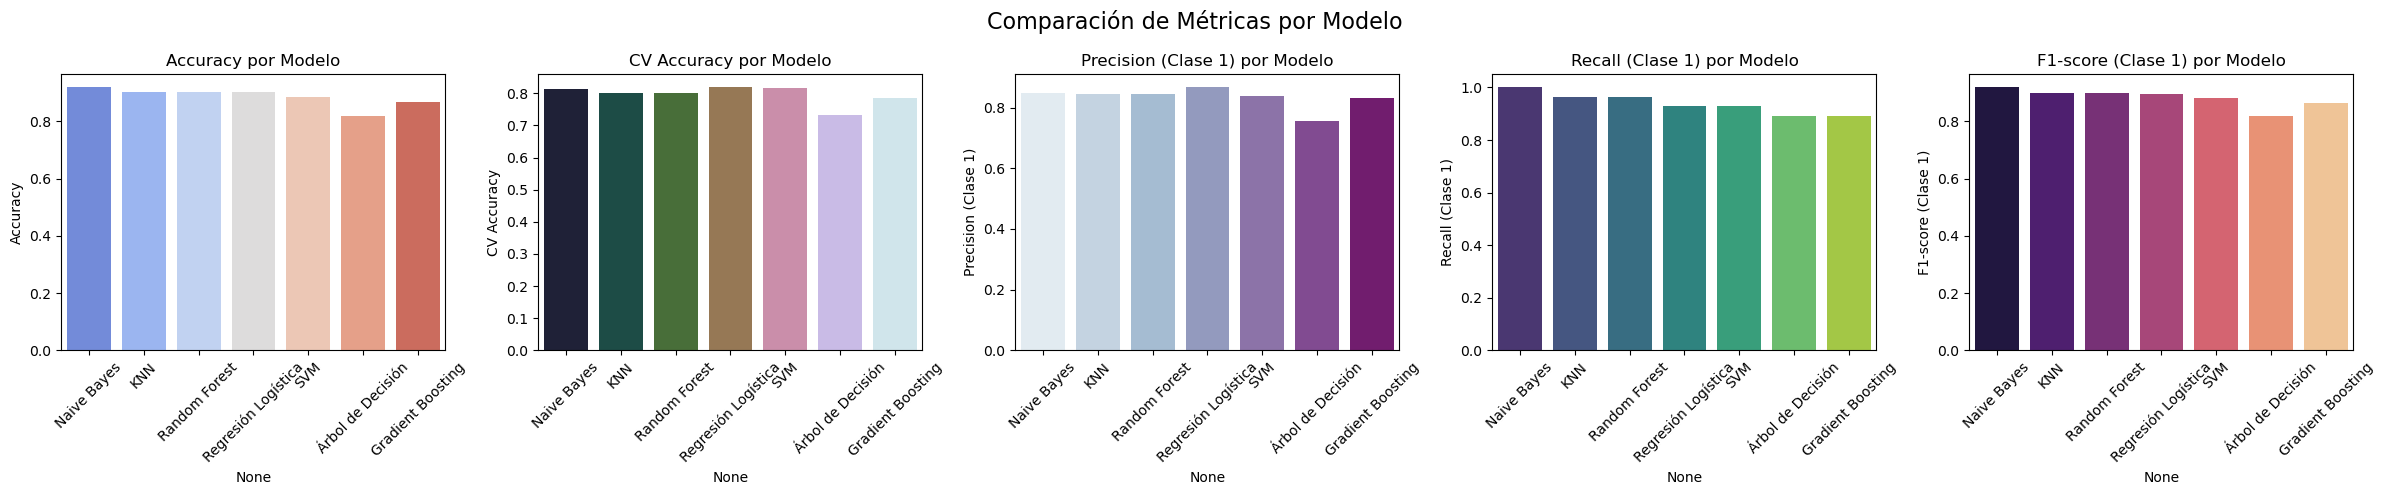

In [261]:
fig, axes = plt.subplots(1, 5, figsize=(24, 5))

# Accuracy
sns.barplot(x=resultados_df.index, y='Accuracy', data=resultados_df, ax=axes[0], palette='coolwarm')
axes[0].set_title('Accuracy por Modelo')
axes[0].tick_params(axis='x', rotation=45)

# CV Accuracy
sns.barplot(x=resultados_df.index, y='CV Accuracy', data=resultados_df, ax=axes[1], palette='cubehelix')
axes[1].set_title('CV Accuracy por Modelo')
axes[1].tick_params(axis='x', rotation=45)

# Precision (Clase 1)
sns.barplot(x=resultados_df.index, y='Precision (Clase 1)', data=resultados_df, ax=axes[2], palette='BuPu')
axes[2].set_title('Precision (Clase 1) por Modelo')
axes[2].tick_params(axis='x', rotation=45)

# Recall (Clase 1)
sns.barplot(x=resultados_df.index, y='Recall (Clase 1)', data=resultados_df, ax=axes[3], palette='viridis')
axes[3].set_title('Recall (Clase 1) por Modelo')
axes[3].tick_params(axis='x', rotation=45)

# F1-score (Clase 1)
sns.barplot(x=resultados_df.index, y='F1-score (Clase 1)', data=resultados_df, ax=axes[4], palette='magma')
axes[4].set_title('F1-score (Clase 1) por Modelo')
axes[4].tick_params(axis='x', rotation=45)

plt.suptitle("Comparación de Métricas por Modelo", fontsize=16)
plt.tight_layout()
plt.show()

Matrices de Confusión de todos los modelos:



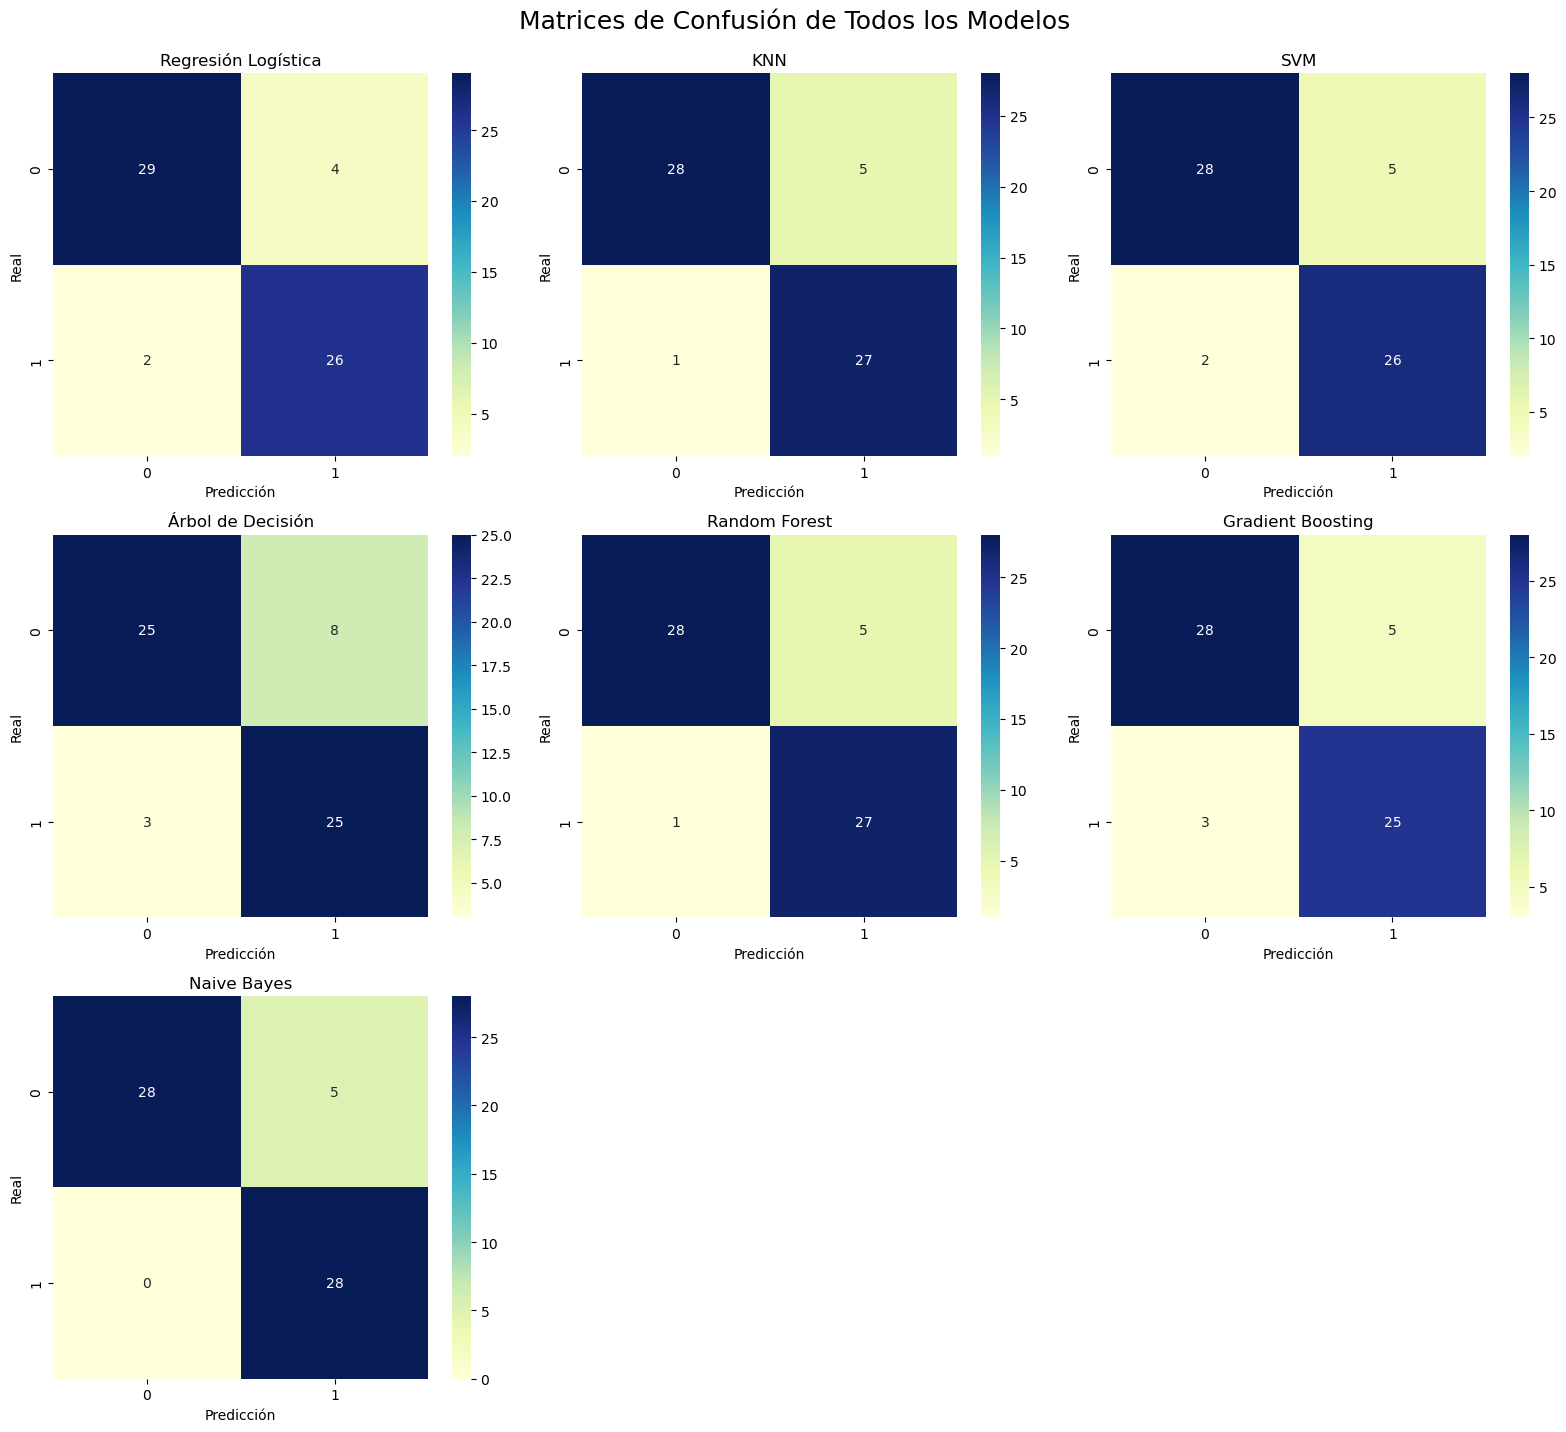

In [262]:
print("Matrices de Confusión de todos los modelos:\n")

fig, axes = plt.subplots(3, 3, figsize=(16, 14))
axes = axes.flatten()

for idx, (nombre, datos) in enumerate(resultados.items()):
    cm = datos['Matriz de Confusión']
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', ax=axes[idx])
    axes[idx].set_title(f'{nombre}')
    axes[idx].set_xlabel('Predicción')
    axes[idx].set_ylabel('Real')

# Quitar ejes vacíos si hay menos de 9 modelos
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Matrices de Confusión de Todos los Modelos", fontsize=18, y=1.02)
plt.show()

In [263]:
mejor_modelo = resultados_df.index[0]
print(f"\n Mejor modelo: {mejor_modelo}")


 Mejor modelo: Naive Bayes


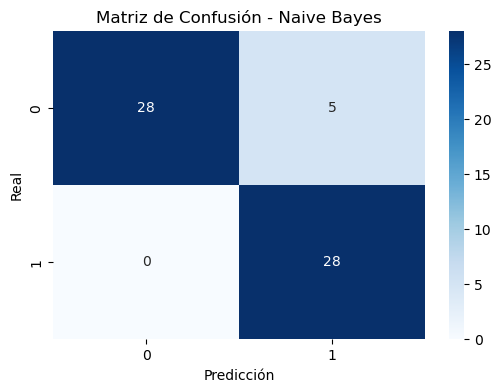

In [264]:
matriz = resultados[mejor_modelo]['Matriz de Confusión']
plt.figure(figsize=(6, 4))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues')
plt.title(f"Matriz de Confusión - {mejor_modelo}")
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

Comparativa de metricas claves en todos los modelos

Detectar presencia de enfermedad cardíaca (Clase 1), por lo que métricas como Recall, F1-score, y Precision para la Clase 1 son clave. Es más grave no detectar una enfermedad (falso negativo) que tener una falsa alarma (falso positivo).

- Recall (Sensibilidad) es crítica → mide cuántos casos positivos reales detectó correctamente.

- F1-score combina Precision y Recall → útil cuando hay un desequilibrio o el costo de error es alto.

Tiene el mejor Recall (1.0): no deja pasar ningún paciente enfermo.


### 6. Poner a punto (fine-tune) esos modelos y si es posible combinarlos en una gran solución.

#### Reentrenamiento con Cross-Validation
- Aplicamos validación cruzada estratificada para asegurar estabilidad del resultado:

In [265]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Modelo
nb_model = GaussianNB()

# Validación cruzada estratificada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(nb_model, X_train, y_train, scoring='recall', cv=cv)

# Resultados
print("Recall promedio (Clase 1):", np.mean(scores))
print("Desviación estándar:", np.std(scores))

Recall promedio (Clase 1): 0.7757575757575758
Desviación estándar: 0.133608531424537


Ajustar el umbral de clasificación, útil cuando nos interesa priorizar recall en lugar de precisión

In [266]:
from sklearn.metrics import recall_score

# Entrenar modelo
nb_model.fit(X_train, y_train)

# Predecir probabilidades
y_probs = nb_model.predict_proba(X_test)[:,1]

# Ajustar el umbral
umbral = 0.3
y_pred_adjusted = (y_probs > umbral).astype(int)

# Evaluar
print("Recall ajustado:", recall_score(y_test, y_pred_adjusted))

Recall ajustado: 1.0


Al mantener el modelo “ajustado” de Naive Bayes mantuvo el mismo recall (1.0)

Matriz de Confusión del Modelo Ajustado

El ajuste de hiperparámetros no hizo que el modelo empeorara.

- Para GaussianNB no hay muchos hiperparámetros para ajustar.

- Aun haciendo validación cruzada o refinamientos, el modelo siguió clasificando correctamente todos los casos positivos → no hubo falsos negativos.

- Esto indica que el modelo Naive Bayes está funcionando “idealmente” para esta métrica.

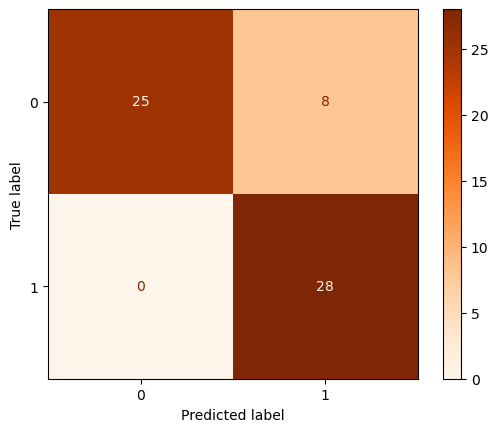

In [267]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot(cmap='Oranges')

### 7. Presentar la solución, ¿Cual es la mejor solución?

#### **¿Por qué Gaussian Naive Bayes?**
El modelo Gaussian Naive Bayes resultó ser el mejor en este caso por varias razones:

- Rendimiento en Recall: Obtuvo un valor de Recall igual a 1.0 en la clase positiva (pacientes con enfermedad cardíaca), es decir, detectó correctamente a todos los enfermos en el conjunto de prueba.
Esto lo convierte en el modelo más confiable desde un punto de vista clínico y ético.

- Simplicidad y eficiencia: Es un modelo muy eficiente para problemas con muchas variables numéricas y supuestos de distribución normal, lo cual se ajusta al tipo de datos que tenemos (como presión arterial, colesterol, frecuencia cardíaca, etc.).

- Generalización con pocos datos: Naive Bayes funciona bien incluso en conjuntos de datos de tamaño reducido y evita el sobreajuste, lo que lo hace ideal para nuestro caso.

- Interpretabilidad: Los modelos Naive Bayes son más fáciles de interpretar y auditar, una característica clave en contextos médicos y de salud pública.

#### **¿Por qué la métrica de evaluación principal es Recall?**

Esto se debe a que:

- Un falso negativo (es decir, predecir que un paciente NO tiene enfermedad cardíaca cuando realmente SÍ la tiene) puede tener consecuencias graves o incluso fatales.

- En cambio, un falso positivo (diagnosticar incorrectamente como enfermo a un paciente sano) puede generar ansiedad y costos innecesarios, pero no compromete la vida directamente.

Por lo tanto, **preferimos un modelo que tenga una alta capacidad de detectar correctamente a los pacientes con enfermedad cardíaca**, aunque ocasionalmente dé falsos positivos.


## **2. MLP Classifier**

In [268]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


Entrenamiento

In [269]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),   # 2 capas ocultas
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42,
    early_stopping=True,
    verbose=True
)
mlp.fit(X_train_scaled, y_train)

Iteration 1, loss = 0.70776649
Validation score: 0.760000
Iteration 2, loss = 0.67057554
Validation score: 0.840000
Iteration 3, loss = 0.64138682
Validation score: 0.840000
Iteration 4, loss = 0.61419473
Validation score: 0.840000
Iteration 5, loss = 0.58972667
Validation score: 0.760000
Iteration 6, loss = 0.56623152
Validation score: 0.760000
Iteration 7, loss = 0.54580691
Validation score: 0.760000
Iteration 8, loss = 0.52654398
Validation score: 0.760000
Iteration 9, loss = 0.50821840
Validation score: 0.720000
Iteration 10, loss = 0.49115317
Validation score: 0.760000
Iteration 11, loss = 0.47573529
Validation score: 0.760000
Iteration 12, loss = 0.46149723
Validation score: 0.760000
Iteration 13, loss = 0.44920392
Validation score: 0.760000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 50), max_iter=300,
              random_state=42, verbose=True)

Evaluación del modelo

Accuracy: 0.7213114754098361
Reporte de clasificación:


              precision    recall  f1-score   support

           0       0.74      0.76      0.75        33
           1       0.70      0.68      0.69        28

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



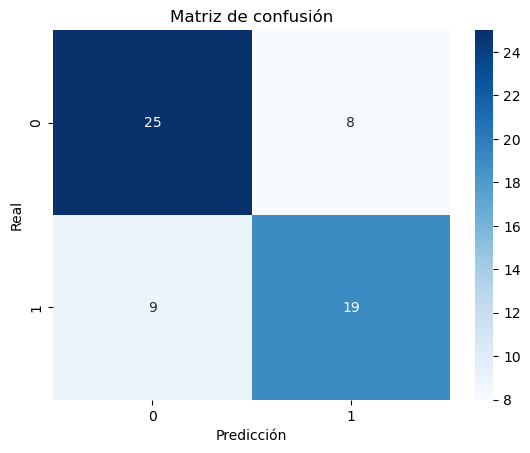

In [270]:
y_pred = mlp.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

 Búsqueda de hiperparámetros

In [271]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [300]

}

grid = GridSearchCV(MLPClassifier(random_state=42, early_stopping=True), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid.fit(X_train_scaled, y_train)

print("Mejores parámetros:", grid.best_params_)

best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
print("Accuracy del mejor modelo:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores parámetros: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.01, 'max_iter': 300}
Accuracy del mejor modelo: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        33
           1       0.86      0.86      0.86        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



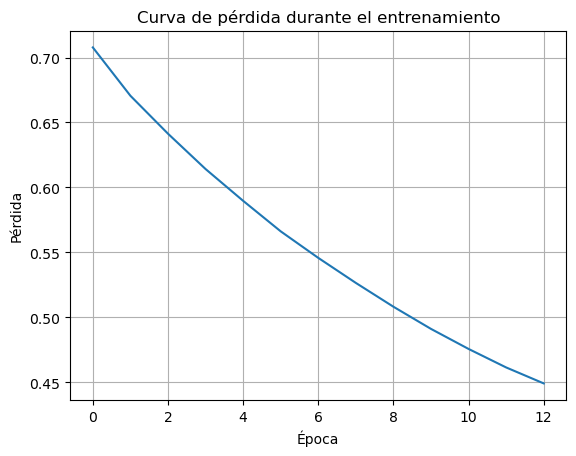

In [272]:
plt.plot(mlp.loss_curve_)
plt.title("Curva de pérdida durante el entrenamiento")
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.grid(True)
plt.show()

## XGBoost

In [312]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier

In [582]:
xgb = XGBClassifier(
    use_label_encoder=False,       # Para evitar warnings
    eval_metric='logloss',         # Métrica base para clasificación binaria
    learning_rate=0.04,
    max_depth=2,
    n_estimators=48,
    subsample=0.8,
    gamma=1,
    min_child_weight=1.3, #  Regularización adicional (min. suma de hess)
    random_state=42
)

Entrenamiento del modelo

In [583]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.04, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=1.3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=48,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [584]:
train_sizes, train_scores, test_scores = learning_curve(
estimator=xgb,
X=X_train,
y=y_train,
train_sizes=np.linspace(0.1, 1.0, 10),
cv=10,
scoring='accuracy',
n_jobs=-1
)

Media y desviación estandar para cada tamaño de las muestras

In [585]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

Gráfico de curva de aprendizaje

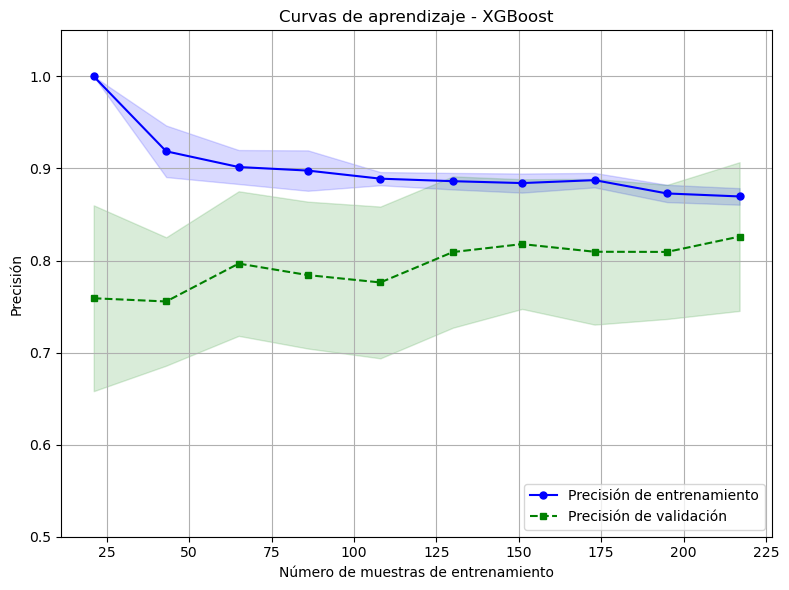

In [586]:
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Precisión de entrenamiento')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Precisión de validación')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

plt.title('Curvas de aprendizaje - XGBoost')
plt.xlabel('Número de muestras de entrenamiento')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.grid(True)
plt.ylim([0.5, 1.05]) # Ajusta el rango de precisión si deseas
plt.tight_layout()
plt.show()



- 🔵 La línea azul (precisión de entrenamiento) comienza cerca de 1.0 con pocas muestras, y disminuye ligeramente a medida que aumentan las muestras. Esto es normal y muestra que con más datos, el modelo generaliza más.
- 🟢 La línea verde (precisión de validación) empieza baja (~0.76) pero mejora progresivamente hasta estabilizarse cerca de 0.83.
- La curva tiene una forma esperada y saludable.


Reentrena el modelo con logs

In [587]:
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb.fit(X_train, y_train, eval_set=eval_set, verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.04, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=1.3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=48,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

Gráfico de la curva de pérdida (Log loss vs. número de árboles)

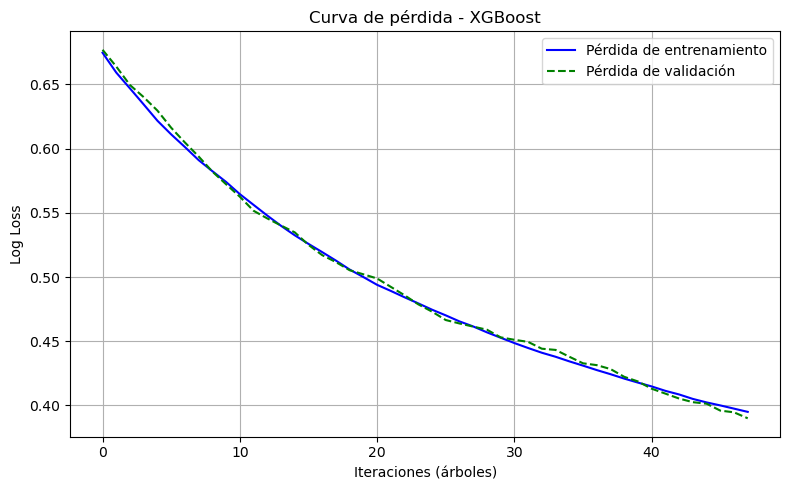

In [588]:
# RESULTADOS DE LOSS
results = xgb.evals_result()

# GRÁFICA DE LA CURVA DE PÉRDIDA
plt.figure(figsize=(8,5))
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

plt.plot(x_axis, results['validation_0']['logloss'], label='Pérdida de entrenamiento', color='blue')
plt.plot(x_axis, results['validation_1']['logloss'], label='Pérdida de validación', color='green', linestyle='--')

plt.xlabel('Iteraciones (árboles)')
plt.ylabel('Log Loss')
plt.title('Curva de pérdida - XGBoost')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

- 🔵 La línea azul (pérdida de entrenamiento) y 🟢 la línea verde (pérdida de validación) descienden consistentemente a medida que aumentan las iteraciones
- Ambas líneas están muy juntas, lo que indica buena generalización.
- El modelo está aprendiendo correctamente.

In [589]:
y_pred_xgb = xgb.predict(X_test)

In [590]:
# EVALUACIÓN DEL MODELO
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_xgb))

Accuracy: 0.8852459016393442
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90        33
           1       0.89      0.86      0.87        28

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



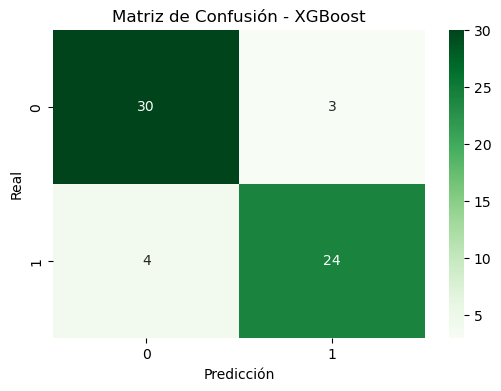

In [591]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusión - XGBoost")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

Esta matriz de confusión muestra el desempeño del modelo XGBoost al clasificar dos clases. El modelo acierta en 54 de los 61 casos, con una precisión del 88.5%